 <h1> ADRIÁN HERNÁNDEZ PADRÓN</h1>

En este programa trabajaremos en la resolución de problemas con valores iniciales del tipo:

<center>$y'(x)=f(x,y(x))$

<center>$ y(x_{0})=y_{0}$
    

Nosotros nos centraremos en el caso del oscilador primero el oscilador armónico simple y luego una vez resuelto el oscilador armónico con los diferentes métodos propuestos, intentaremos enfocar algun modelo epidemológico.
    
    
    
La ecuación diferencial del oscilador armónico es la siguiente:
<center>$y''=-w^2\cdot y$
    
si llamamos a $y' = v$,  nos queda   $v' = y'' = -w^2\cdot y$. 

De manera que hemos descompuesto nuestra ecuación diferencial en dos las cuales nos otorga información sobre la velocidad y al posición de nuestro sistema.
Para trabajar con estas dos ecuaciones a lo largo de todo el programa, definí una matriz dentro de la funcion de manera que la primera columna me guarde la posicion de la masa a lo largo del tiempo y la seguna haga lo mismo con la velocidad.

Para saber tener como referencia la gráfica de el espacio y la velocidad, empecé a trabajar integrando directamente la ecuación diferencial de modo meramente orientativo.

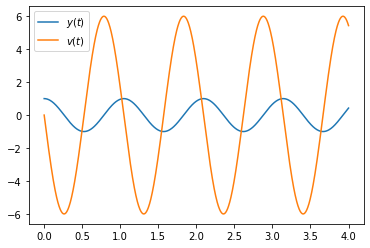

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*
from scipy.integrate import odeint

w = 6
def f(y, t): 
    return np.array([y[1], -w**2*y[0]])
t = np.linspace(0, 4, 1000)
y0 = np.array([1.0, 0.0])
sol = odeint(f, y0, t)

y1 = [0, 0]
t1 = 0

plt.plot(t, sol[:, 0], label='$y(t)$')
plt.plot(t, sol[:, 1], label='$v(t)$')
plt.legend()



Método de Euler 

Comenzamos aplicando el metodo de Euler, el cual es el mas sencillo de los tres que vamos a hacer.

Tomando el valor inicial conocido al que llamamos $y_i$, podemos hallar el siguiente valor, $y_{i+1}$, el metodo de euler para resolver estos problemas de valores iniciales es el siguiente:

$y_{i+1}=y_i+h \cdot f(x_i,y_i)$

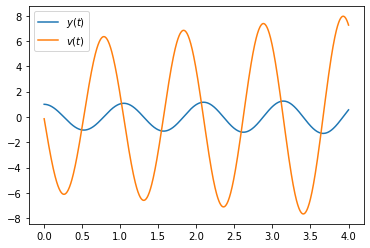

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*


w = 6
def f(y, t): # Definimos la función donde introduciremos por medio de arrays los datos de v(t) e y(t)
    return np.array([y[1], -w**2*y[0]])

t = np.linspace(0, 4, 1000)#array con los valores de t
h = 4/1000
y0 = np.array([1.0, 0.0])#condiciones iniciales
#arrays donde introduciremos los datos de v(t) e y(t)
y2 = []
y3 = []
#definimos el metodo de euler
for i in range(len (t)):
    y0 += h*f(y0, t)
    y2.append(y0[0])
    y3.append(y0[1])
     
    
#graficamos
plt.plot(t, y2 , label='$y(t)$')
plt.plot(t, y3, label='$v(t)$')
plt.legend()


Runge-kutta
El método de Runge-kutta usado es el clásico de orden 4.
El método es el siguiente:


 \begin{cases}k_{1}&=f\left(x_{i},y_{i}\right)\\k_{2}&=f\left(x_{i}+{1 \over 2}h,y_{i}+{1 \over 2}k_{1}h\right)\\k_{3}&=f\left(x_{i}+{1 \over 2}h,y_{i}+{1 \over 2}k_{2}h\right)\\k_{4}&=f\left(x_{i}+h,y_{i}+k_{3}h\right)\\\end{cases}
    
Siendo la solución de nuestro problema:

<center>$y_{i+1}=y_i+h/6\cdot*(k1 + 2k2 + 2k3 + k4)$

donde en este caso se toman dos aproximaciones diferentes para el valor de la función
en el punto medio, la segunda de ellas utilizando la calculada previamente.
 

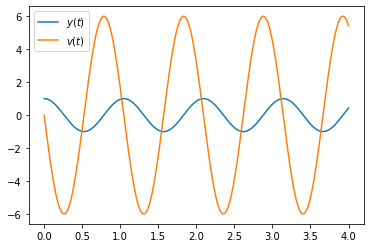

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*


w = 6
def f1(y, t): # Definimos la función donde introduciremos por medio de arrays los datos de v(t) e y(t)
    return np.array([y[1], -w**2*y[0]])

t0, tf = 0.0, 4 #cota inferior y superior por donde se va a mover nuestra función
n = 10000
h1 = (tf - t0)/n
y01 = np.array([1.0, 0.0])#condiciones iniciales
#arrays donde introduciremos los datos de v(t), y(t) y del tiempo
y22 = []
y33 = []
tt = []

#definimos el metodo de runge-kutta
for i in range (n + 1):
    t0 += h1
    tt.append(t0)
    k1 = h1 * f1(y01, t0)
    k2 = h1 * f1(y01 + (k1/2), t0 + (h1/2))
    k3 = h1 * f1(y01 + (k2/2), t0 + (h1/2))
    k4 = h1 * f1(y01 + k3,t0 + h1)
    y01 += (k1 + 2*k2 + 2*k3 + k4)/6
    y22.append(y01[0])
    y33.append(y01[1])
#graficamos   
plt.plot(tt, y22 , label='$y(t)$')
plt.plot(tt, y33, label='$v(t)$')
plt.legend()


Predictor-corrector
Como sabemos el metodo predictor-corrector tiene varias alternativas, en este caso usamos el método de milne de cuarto orden.

El predictor en este caso es :


<center>$ y_{i+1,0}=y_{i-3}+ \dfrac {4h}{3} \cdot \left[ 2f(x_i,y_i)-f(x_{i-1},y_{i-1})+2f(x_{i-2},y_{i-2}) \right]$
    
Y el corrector:

<center>$ y_{i+1,j}=y_{i-1}+\dfrac {h}{3} \cdot \left[ f(x_{i+1},y_{i+1,j-1}^{*})+4f(x_i,y_i)+f(x_{i-1},y_{i-1}) \right] $


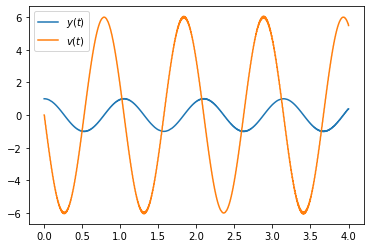

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*


w = 6
def f2(y, t): # Definimos la función donde introduciremos por medio de arrays los datos de v(t) e y(t)
    return np.array([y[1], -w**2*y[0]])

t = np.linspace(0, 4, 1000)#array con los valores de t
h = 4/1000
#en este método necesitamos 4 valores iniciales para v e y
yec = np.zeros(2000)#creamos un array con 2t ceros
yex = yec[0:8]#cogemos los 8 primeras posiciones del array y colocamos nuestras condiciones iniciales
yex[0:8] = np.array([1.0, 0.0, 0.99990181,-0.05605421,0.99960724, -0.11209742, 0.999412, -0.01679999])
y02 = yec.reshape(1000,2)#organizamos en un array de 1000x2 de manera que nos quede un array como el que hemos usado anteriormente
#vamos a trabajar con el predictor y el corrector haciendo uso de los valores iniciales
y0p = y02
y0c = y02

#definimos el método de predictor-corrector
for j in range (0, len(t)-4):
    y0p[j+4] = y02[j] + 4*h/3*(2*f2(y02[j+3],t[j+3])-f2(y02[j+2],t[j+2])+2*f2(y02[j+1],t[j+1]))
    y0c[j+2]= y02[j] + h/3*(f2(y0p[j+2],t[j+2])+4*f2(y02[j+1],t[j+1])+f2(y02[j],t[j]))
#graficamos  
plt.plot(t, y0c[:,0] , label='$y(t)$')
plt.plot(t, y0c[:,1], label='$v(t)$')
plt.legend()     
    

Podemos hacer una mejora del predictor-corrector de la siguiente manera.

El nuevo predictor será:
    
<center>$y_{i+1,0}^{*} = y_{i+1,0}+ \dfrac {28}{29} \cdot (y_{i,1}-y_{i,0})$
    
Mientras que el nuevo corrector:

<center>$y_{i+1,1}=y_{i-1}+\dfrac {h}{3} \cdot \left[ f(x_{i+1},y_{i+1,0}^{*})+4f(x_i,y_i)+f(x_{i-1},y_{i-1}) \right] $ 
   
   

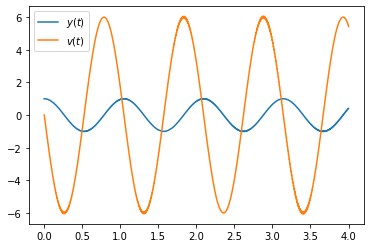

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*

#igual que el metodo del predictor-corrector añadiendo en el bucle donde definimos dicho método la mejora
w = 6
def f2(y, t): 
    return np.array([y[1], -w**2*y[0]])

t = np.linspace(0, 4, 1000)
h = 4/1000

yec = np.zeros(2000)
yex = yec[0:8]
yex[0:8] = np.array([1.0, 0.0, 0.99990181,-0.05605421,0.99960724, -0.11209742, 0.999412, -0.01679999])
y02 = yec.reshape(1000,2)
y0p = y02
y0c = y02
ypm = y02
ycm = y02

#predictor-corrector con mejora
for j in range (0, len (t)-4):
    y0p[j+4] = y0p[j] + 4*h/3*(2*f2(y0p[j+3],t[j+3])-f2(y0p[j+2],t[j+2])+2*f2(y0p[j+1],t[j+1]))
    y0c[j+2] = y0c[j] + (t[j+1]-t[j])/3*(f2(y0p[j+2],t[j+2])+4*f2(y0c[j+1],t[j+1])+f2(y0c[j],t[j]))
    ypm[j+1] = y0p[j+1] +28/29*(y0c[j]-y0p[j])
    ycm[j] = (28*y0c[j]+ypm[j])/29

#graficamos
plt.plot(t, ycm[:,0] , label='$y(t)$')
plt.plot(t, ycm[:,1], label='$v(t)$')
plt.legend()     
 


Ahora vamos a resolver el oscilador armónico mediante el método de euler pero generando valores iniciales aleatorios para la posición y la velocidad

Usando np.random.normal() haremos que se creen unos valores iniciales aleatorios para la posición y la velocidad con los cuales resolveremos el problema. Con ayuda de un bucle crearemos L valores aleatorios los cual procederemos a graficar todos junto con sus respectivas medias.

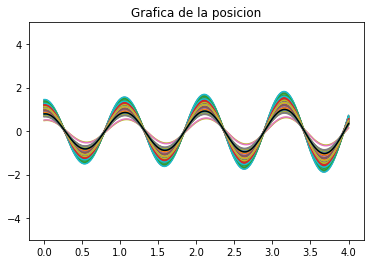

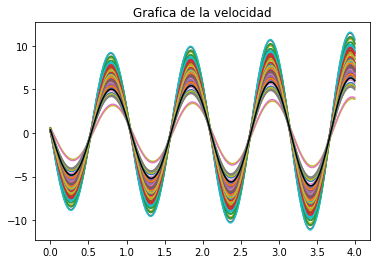

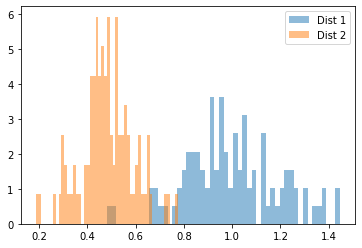

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import*


w = 6                                           
def f(y): # Definimos la función donde introduciremos por medio de arrays los datos de v(t) e y(t).
    return np.array([y[1], -w**2*y[0]])

t = np.linspace(0, 4, 1000)#array con los valores de t.
h = 4/1000

#definimos una media y una varianza para calcular los valores aleatorios
media = 1
var = 0.2
media1 = 0.5
var1= 0.1
L = 100

a = np.zeros(2*L).reshape(2,L)
#arrays para sacar los valores de la media para la posición y la velocidad.
resultado = np.zeros((L, 1000))
resultado1 = np.zeros((L, 1000))
#Realizo un bucle para que los valores iniciales y0 sean distintos y elegidos al azar en cada iteración.
for j in range (L):
    y0 = np.array([np.random.normal(media, var),np.random.normal(media1, var1)])#Valores iniciales aleatorios
    a[:,j] = y0 #introduzco todos los valores de y0 para verlos en una grafica luego
    y2 = []
    y3 = []
    for i in range(len (t)):#definimos el método de euler
        y0 += h*f(y0)
        y2.append(y0[0])
        y3.append(y0[1])
        resultado[:,i] = y0[0]
        resultado1[:,i] = y0[1]  
#Graficamos la posición y la velocidad
    figure(0)
    plt.plot(t, y2)
    title('Grafica de la posicion')
    figure(1)
    plt.plot(t, y3)
    title('Grafica de la velocidad')
#Graficamos en color negro la media de la pocisión y la velocidad en las correspondientes gráficas
figure(0)
med = np.mean(resultado, axis=0)
plt.plot(t, med, color = 'black')
ylim(-5,5)
figure(1)    
med1 = np.mean(resultado1, axis=0)
plt.plot(t, med1, color = 'black')
#Siguiendo la ayuda que se subió al campus hacemos un histograma para ver el muestreo de nuestros datos
figure(2)
bins = 50
n1, bins1, patch1 = plt.hist(a[0], bins, density=True, alpha=0.5,label="Dist 1")
n2, bins2, patch2 = plt.hist(a[1], bins, density=True, alpha=0.5,label="Dist 2")
plt.legend(loc='best')    


Por último vamos a resolver un modelo epidemológico tipo SEIR que consta de las siguientes ecuaciones:


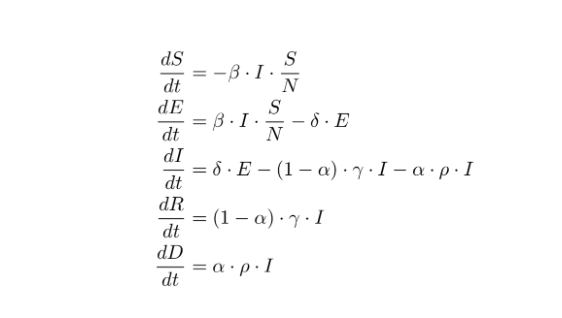

Este modelo incopora las muertes que se pueden predecir según la mortalidad del virus.

Vamos a analizar sin modificar el factor R0 que es el que nos indica de cuando se inicia la cuarentena, por tanto lo que vamos a ver en un principio son la evolución de un virus sin medidas.

Los datos de las variables han sido sacado de la bibliografía, he intentado emular el caso de España colocando las variables correspondientes para luego poder hacer un análisis de este.


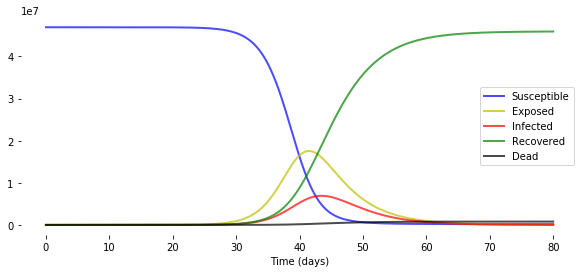

In [224]:
#Vamos a definir el sistema de ecuaciones con el que vamos a trabajar
def f(y, t):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return np.array([dSdt, dEdt, dIdt, dRdt, dDdt])

Rbg = 5 #Medidas sin cuarentenas
N = 46940000 # Población
gamma = 1.0/1.935 #Proporción de infectados y recuperados por días
delta = 1.0 / 5 # Periodo de incubación de 5 días(suelen aparecer los sintomas)
beta = Rbg * gamma 
alpha = 0.118  # Porcentaje de muertes
rho = 1/15  # 15 dias desde la que se infecta hasta que se muere
S0, E0, I0, R0, D0 = N-1., 10., 0., 0., 0. # Condiciones iniciales


tp = np.linspace(0, 100,8000) # Tiempo
y0 = np.array([S0, E0, I0, R0, D0]) # Array con las condiciones iniciales

#Analizamos por runge-kutta
t0 = 0
h = 0.01
tt = []
ss2 = []
ss3 = []
ss4 = []
ss5 = []
ss6 = []

# definimos el metodo de runge-kutta
for i in range (len(tp)):
    t0 += h
    tt.append(t0)
    k1 = h * f(y0, t0)
    k2 = h * f(y0 + (k1/2), t0 + (h/2))
    k3 = h * f(y0 + (k2/2), t0 + (h/2))
    k4 = h * f(y0 + k3,t0 + h)
    y0 += (k1 + 2*k2 + 2.*k3 + k4)/6.
    ss2.append(y0[0])
    ss3.append(y0[1])
    ss4.append(y0[2]) 
    ss5.append(y0[3])
    ss6.append(y0[4]) 

f, ax = plt.subplots(1,1,figsize=(10,4))
plt.plot(tt, ss2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(tt, ss3, 'y', alpha=0.7, linewidth=2, label='Exposed')
plt.plot(tt, ss4, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(tt, ss5, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt.plot(tt, ss6, 'k', alpha=0.7, linewidth=2, label='Dead')
ax.set_xlabel('Time (days)')
legend = ax.legend()
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

Podríamos introducir que beta dependa del tiempo transcurrido para así intentar expresar las medidas de cuarentena.
Si por ejemplo queremos indicar como se comportarían los grupos introduciendo medidas de cuarentena en un dia determinado bastaría con añadir una serie de condiciones.

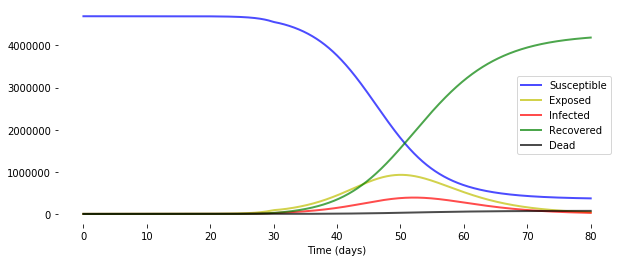

In [234]:
#Vamos a definir el sistema de ecuaciones con el que vamos a trabajar
def f(y, t):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return np.array([dSdt, dEdt, dIdt, dRdt, dDdt])
L = 30
Rbg = 5 #Medidas sin cuarentenas
N = 4694000  # Población
gamma = 1.0/1.935 #Proporción de infectados y recuperados por días en España
delta = 1.0 / 5 # Periodo de incubación de 5 días(suelen aparecer los sintomas)
beta = Rbg * gamma 
alpha = 0.118  # Porcentaje de muertes
rho = 1/15  # 9 dias desde la que se infecta hasta que se muere
S0, E0, I0, R0, D0 = N-1., 1., 0., 0., 0. # Condiciones iniciales
def R_0(tp):
    return 5.0 if tp < L else 2.5
def beta(tp):
    return R_0(tp) * gamma


tp = np.linspace(0, 100,8000) # Tiempo
y0 = np.array([S0, E0, I0, R0, D0]) # Array con las condiciones iniciales

#Analizamos por runge-kutta
t0 = 0
h = 0.01
tt = []
ss2 = []
ss3 = []
ss4 = []
ss5 = []
ss6 = []

# definimos el metodo de runge-kutta
for i in range (len(tp)):
    t0 += h
    tt.append(t0)
    k1 = h * f(y0, t0)
    k2 = h * f(y0 + (k1/2), t0 + (h/2))
    k3 = h * f(y0 + (k2/2), t0 + (h/2))
    k4 = h * f(y0 + k3,t0 + h)
    y0 += (k1 + 2*k2 + 2.*k3 + k4)/6.
    ss2.append(y0[0])
    ss3.append(y0[1])
    ss4.append(y0[2]) 
    ss5.append(y0[3])
    ss6.append(y0[4]) 

f, ax = plt.subplots(1,1,figsize=(10,4))
plt.plot(tt, ss2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(tt, ss3, 'y', alpha=0.7, linewidth=2, label='Exposed')
plt.plot(tt, ss4, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(tt, ss5, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt.plot(tt, ss6, 'k', alpha=0.7, linewidth=2, label='Dead')
ax.set_xlabel('Time (days)')
legend = ax.legend()
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

Vamos a analizar los datos de infectados/muertes y a compararlo con los datos reales de España.

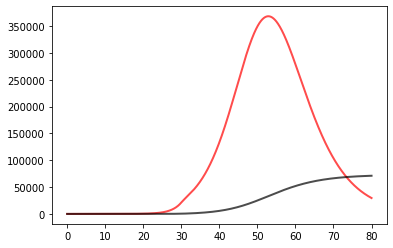

In [230]:
plt.plot(tt, ss4, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(tt, ss6, 'k', alpha=0.7, linewidth=2, label='Dead')
ax.set_xlabel('Time (days)')
legend = ax.legend()
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

Los datos de infectados/muertes de españan vienen adjuntados en la siguiente gráfica

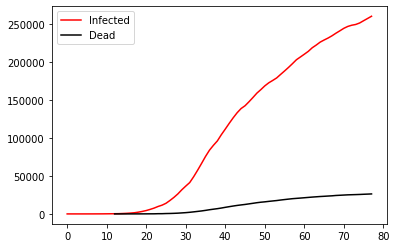

In [218]:
import pandas as pd
url = 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/nacional_covid19.csv'
df = pd.read_csv(url, error_bad_lines=False)
 
plt.plot(np.arange(len(df.iloc[:,1])), df.iloc[:,1], c ='r', label = 'Infected')
plt.plot(np.arange(len(df.iloc[:,1])), df.iloc[:,5], c ='k', label = 'Dead')
plt.legend()
plt.show()

Vemos que ambas curvas presentan similitud con las gaficadas mediante la resolución del modelo epidemológico. 

Ambas gráficas poseen las misma estructura aunque están centradas en distintos puntos, en la de España parece que no ha alcanzado aun su punto mas alto mientras que en el modelo sí. 

Esto puede deberse a fallos en los valores de las variables o porque el método no emula con suficiente precisión la situación real. 

En los datos reales de España, la forma que tiene el numero de infectados en España es debido a que hubo un contagio masivo inicial seguido de las medidas de cuarentena, podemos ver un cambio considerable en la pendiente entre los 40-50 dias que es debido a las medidas de cuarentena. 

Se puede sacar como conclusión que (al menos este método SEIR) nos muestra el comportamiento ideal de un virus que actua bajo una serie de condiciones, la situación real suele se mas compleja porque suele estar sujeto a los comportamientos y actuaciones de los humanos bajo la situación de emergencia la cual puede alterar dicha curva